In [1]:
# 4/25 기준
from transformers import pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
qa = pipeline("question-answering")
sentiment = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)
2022-04-29 13:43:04.889486: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
All model checkpoint layers were used when initializing TFDistilBertForQuestionAnswering.

All the layers of TFDistilBertForQuestionAnswering were initialized from the model checkpoint at distilbert-base-cased-distilled-squad.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForQuestionAnswering for predictions without further training.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDi

In [3]:
kakao_price = pd.read_csv('/Users/junho/Desktop/data/final_csv/kakao.csv')
kakao_price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,78400.0,79300.0,77100.0,79200.0,79163.015625,4268700
1,2021-01-05,78600.0,79100.0,77400.0,78600.0,78563.296875,3742795
2,2021-01-06,79000.0,82000.0,78900.0,79100.0,79063.062500,7178575
3,2021-01-07,80400.0,80700.0,78600.0,80500.0,80462.414062,3875955
4,2021-01-08,82600.0,87200.0,80900.0,86800.0,86759.468750,12333575
...,...,...,...,...,...,...,...
321,2022-04-22,92200.0,92400.0,91400.0,92000.0,92000.000000,1553904
322,2022-04-25,90400.0,91600.0,89600.0,89700.0,89700.000000,1511408
323,2022-04-26,89800.0,91700.0,89700.0,90200.0,90200.000000,1368258
324,2022-04-27,87600.0,88900.0,87600.0,88400.0,88400.000000,1390581


In [4]:
target = pd.DataFrame(kakao_price.loc[77:322,['Date','Close']]).reset_index()
target = target.drop('index',axis=1)
target['Date'] = pd.to_datetime(target['Date'],format='%Y-%m-%d')

target

,Date,Close
0,2021-04-26,118000.0
1,2021-04-27,121500.0
2,2021-04-28,119500.0
3,2021-04-29,117000.0
4,2021-04-30,113500.0
...,...,...
241,2022-04-19,95100.0
242,2022-04-20,95100.0
243,2022-04-21,93600.0
244,2022-04-22,92000.0


In [29]:
resampled_target = pd.DataFrame(target.resample(rule='1W', on='Date'))
resampled_target

temp = []
for i in range(len(resampled_target)):
    temp.append(resampled_target[1][i].mean())

week_price_mean = pd.DataFrame(temp)
week_price_mean.to_csv('/Users/junho/Desktop/data/final_csv/kakao_week_mean.csv')

/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_5593/2274843583.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  temp.append(resampled_target[1][i].mean())


In [5]:
translated_article = list(pd.read_csv('/Users/junho/Desktop/data/final_csv/translate_article.csv')['0'])
date = list(pd.read_csv('/Users/junho/Desktop/data/final_csv/date.csv')['data'])

article_table = pd.DataFrame()
article_table['date'] = date
article_table['translated_article'] = translated_article
article_table['date'] = pd.to_datetime(article_table['date'],format='%Y-%m-%d')
article_table

,date,translated_article
0,2022-04-25,"73 52 -weeks, including Naver, is a high -end ..."
1,2022-04-25,-This 35 million residents of Chao Yang-gu thr...
2,2022-04-21,Mirae Asset Securities announced on the 21st t...
3,2022-04-20,Korea Investment & Securities Korea Investment...
4,2022-04-18,NAVER sales of 1.8 trillion won and Kakao sale...
...,...,...
437,2021-05-03,Reporter Shin Woong -su = KOSPI index is appea...
438,2021-05-02,KOSPI and KOSDAQ showed four consecutive days ...
439,2021-05-02,KOSPI and KOSDAQ showed four consecutive days ...
440,2021-04-29,Investors are already consulting at the Korea ...


In [6]:
article_table['year'] = article_table['date'].dt.year

In [7]:
resampled = pd.DataFrame(article_table.resample(rule='1W', on='date'))
resampled[1][0]

,date,translated_article,year
440,2021-04-29,Investors are already consulting at the Korea ...,2021
441,2021-04-29,Investors are consulting at the Korea Investme...,2021
438,2021-05-02,KOSPI and KOSDAQ showed four consecutive days ...,2021
439,2021-05-02,KOSPI and KOSDAQ showed four consecutive days ...,2021


In [20]:
question = 'Will the stock price of cacao go up?'
data = []
for i in range(len(translated_article)):
    ans = qa(question = question, context = translated_article[i])
    senti = sentiment(ans.get('answer'))
    print(ans)
    print(senti)
    data.append(senti)

/Users/junho/tensorflow_macos_venv/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/Users/junho/tensorflow_macos_venv/lib/python3.8/site-packages/transformers/pipelines/question_answering.py:298: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_mask = np.asarray(


{'score': 0.3527669608592987, 'start': 1705, 'end': 1791, 'answer': "stock prices are showing a decline due to the increase in foreign investors' departure"}
[{'label': 'NEGATIVE', 'score': 0.998565137386322}]
{'score': 0.02115343138575554, 'start': 3848, 'end': 3885, 'answer': 'the market cap declined $ 442 billion'}
[{'label': 'NEGATIVE', 'score': 0.9994383454322815}]
{'score': 0.0019294380908831954, 'start': 405, 'end': 408, 'answer': 'ELW'}
[{'label': 'POSITIVE', 'score': 0.9670606255531311}]
{'score': 0.01124668214470148, 'start': 1146, 'end': 1172, 'answer': 'KakaoTalk channel True ELW'}
[{'label': 'POSITIVE', 'score': 0.980599045753479}]
{'score': 0.6901472210884094, 'start': 2276, 'end': 2287, 'answer': '150,000 won'}
[{'label': 'POSITIVE', 'score': 0.9996310472488403}]
{'score': 0.2375100702047348, 'start': 182, 'end': 216, 'answer': 'stock prices are not going to fall'}
[{'label': 'POSITIVE', 'score': 0.9984229803085327}]
{'score': 0.20027464628219604, 'start': 1216, 'end': 1

{'score': 0.0333537720143795, 'start': 2268, 'end': 2316, 'answer': 'the share price is promised to open the 5000 era'}
[{'label': 'POSITIVE', 'score': 0.9984844326972961}]
{'score': 0.10483890771865845, 'start': 2396, 'end': 2444, 'answer': 'the share price is promised to open the 5000 era'}
[{'label': 'POSITIVE', 'score': 0.9984844326972961}]
{'score': 0.02575516700744629, 'start': 724, 'end': 741, 'answer': 'It is in progress'}
[{'label': 'POSITIVE', 'score': 0.9994015693664551}]
{'score': 0.05184202268719673, 'start': 1047, 'end': 1101, 'answer': 'it will go down to 700 in about a year and four months'}
[{'label': 'NEGATIVE', 'score': 0.9481992721557617}]
{'score': 0.29410478472709656, 'start': 1140, 'end': 1172, 'answer': 'Wemade shares fell more than 28%'}
[{'label': 'NEGATIVE', 'score': 0.9996405839920044}]
{'score': 0.003051002509891987, 'start': 2964, 'end': 3023, 'answer': 'Currently, it can be invested in all stocks listed in Korea'}
[{'label': 'POSITIVE', 'score': 0.9939442

{'score': 0.3442932367324829, 'start': 197, 'end': 229, 'answer': 'The stock price has risen by 16%'}
[{'label': 'POSITIVE', 'score': 0.9845579266548157}]
{'score': 0.25286081433296204, 'start': 1998, 'end': 2041, 'answer': 'The price drops 3.40% from the previous day'}
[{'label': 'NEGATIVE', 'score': 0.9993165731430054}]
{'score': 0.3518844246864319, 'start': 1563, 'end': 1567, 'answer': 'drop'}
[{'label': 'POSITIVE', 'score': 0.7641976475715637}]
{'score': 0.33129554986953735, 'start': 1190, 'end': 1210, 'answer': 'KOSDAQ dropped 3.75%'}
[{'label': 'NEGATIVE', 'score': 0.998345136642456}]
{'score': 0.0003161344793625176, 'start': 1364, 'end': 1402, 'answer': 'up 13.26 points from the previous day.'}
[{'label': 'POSITIVE', 'score': 0.9967166781425476}]
{'score': 0.3847275674343109, 'start': 1551, 'end': 1579, 'answer': 'the stock price will rebound'}
[{'label': 'POSITIVE', 'score': 0.9987700581550598}]
{'score': 0.021022478118538857, 'start': 499, 'end': 544, 'answer': "Kakao Games' s

{'score': 0.12426109611988068, 'start': 416, 'end': 454, 'answer': 'Dear Yu stock price rose to 6,7600 won'}
[{'label': 'POSITIVE', 'score': 0.9584218263626099}]
{'score': 0.09176284819841385, 'start': 1712, 'end': 1743, 'answer': "Kakao's stock price was 500 won"}
[{'label': 'POSITIVE', 'score': 0.945510745048523}]
{'score': 0.4193514585494995, 'start': 3540, 'end': 3572, 'answer': 'the average stock price rose 88%'}
[{'label': 'POSITIVE', 'score': 0.9788161516189575}]
{'score': 0.081173375248909, 'start': 88, 'end': 92, 'answer': 'rose'}
[{'label': 'POSITIVE', 'score': 0.9995088577270508}]
{'score': 0.19394411146640778, 'start': 3482, 'end': 3514, 'answer': 'the average stock price rose 88%'}
[{'label': 'POSITIVE', 'score': 0.9788161516189575}]
{'score': 0.10306116193532944, 'start': 2326, 'end': 2369, 'answer': 'fell to 70,000 won on the day of its launch'}
[{'label': 'NEGATIVE', 'score': 0.995165228843689}]
{'score': 0.32853811979293823, 'start': 1512, 'end': 1581, 'answer': 'If yo

{'score': 0.11157116293907166, 'start': 197, 'end': 213, 'answer': 'stock price drop'}
[{'label': 'NEGATIVE', 'score': 0.996874213218689}]
{'score': 0.12321878969669342, 'start': 449, 'end': 500, 'answer': 'The price per share was estimated to be 300,000 won'}
[{'label': 'POSITIVE', 'score': 0.6671302914619446}]
{'score': 0.070881187915802, 'start': 1709, 'end': 1740, 'answer': 'it is expected to be profitable'}
[{'label': 'POSITIVE', 'score': 0.9978989362716675}]
{'score': 0.43513157963752747, 'start': 2207, 'end': 2246, 'answer': 'The stock price rising momentum is weak'}
[{'label': 'NEGATIVE', 'score': 0.9997486472129822}]
{'score': 0.43334218859672546, 'start': 2492, 'end': 2494, 'answer': '87'}
[{'label': 'POSITIVE', 'score': 0.9907639622688293}]
{'score': 0.31012609601020813, 'start': 2118, 'end': 2169, 'answer': 'the stock price of battery companies is also strong'}
[{'label': 'POSITIVE', 'score': 0.9992528557777405}]
{'score': 0.028534794226288795, 'start': 1303, 'end': 1326, '

{'score': 0.02622053399682045, 'start': 1166, 'end': 1205, 'answer': 'fallen 23,000 won from the previous day'}
[{'label': 'NEGATIVE', 'score': 0.905299961566925}]
{'score': 0.1773766130208969, 'start': 188, 'end': 196, 'answer': '7430 won'}
[{'label': 'POSITIVE', 'score': 0.9997308850288391}]
{'score': 0.03599445894360542, 'start': 809, 'end': 838, 'answer': 'rose 3,000 won to 10,6500 won'}
[{'label': 'POSITIVE', 'score': 0.9980586171150208}]
{'score': 0.05122015252709389, 'start': 1935, 'end': 2005, 'answer': 'fallen more than 4 trillion won due to the recent drop in stock prices'}
[{'label': 'NEGATIVE', 'score': 0.9992772936820984}]
{'score': 0.11048978567123413, 'start': 385, 'end': 420, 'answer': 'Craepon stocks closed at 49,500 won'}
[{'label': 'NEGATIVE', 'score': 0.9322255253791809}]
{'score': 0.0734969973564148, 'start': 1069, 'end': 1108, 'answer': 'it will increase the price by up to 20%'}
[{'label': 'POSITIVE', 'score': 0.9937328696250916}]
{'score': 0.00058795849326998, 's

{'score': 0.0339411161839962, 'start': 1226, 'end': 1267, 'answer': 'There are many advantages in stock prices'}
[{'label': 'POSITIVE', 'score': 0.9972293972969055}]
{'score': 0.050374098122119904, 'start': 316, 'end': 353, 'answer': 'Kakao rose 3.82%from the previous day'}
[{'label': 'POSITIVE', 'score': 0.9981879591941833}]
{'score': 0.07673321664333344, 'start': 1783, 'end': 1828, 'answer': 'The increase in the stock market has expanded'}
[{'label': 'POSITIVE', 'score': 0.9992716908454895}]
{'score': 0.009950374253094196, 'start': 627, 'end': 664, 'answer': 'rose to second place over Kakao Games'}
[{'label': 'POSITIVE', 'score': 0.9987710118293762}]
{'score': 0.0939054861664772, 'start': 949, 'end': 996, 'answer': 'Chinese government raised the stock stock price'}
[{'label': 'POSITIVE', 'score': 0.961885929107666}]
{'score': 0.5707567930221558, 'start': 54, 'end': 77, 'answer': 'the competition is gone'}
[{'label': 'NEGATIVE', 'score': 0.9995501637458801}]
{'score': 0.21013882756233

{'score': 0.20888879895210266, 'start': 218, 'end': 246, 'answer': "Kakao's share price rose 90%"}
[{'label': 'POSITIVE', 'score': 0.9951993823051453}]
{'score': 0.03396816924214363, 'start': 1532, 'end': 1585, 'answer': 'Lineage TL, will be a key variable of the stock price'}
[{'label': 'POSITIVE', 'score': 0.9697977304458618}]
{'score': 0.1119794249534607, 'start': 2354, 'end': 2429, 'answer': 'the fight over the second place is expected to continue for the time being.'}
[{'label': 'NEGATIVE', 'score': 0.707666277885437}]
{'score': 0.03516948223114014, 'start': 2057, 'end': 2132, 'answer': 'the fight over the second place is expected to continue for the time being.'}
[{'label': 'NEGATIVE', 'score': 0.707666277885437}]
{'score': 0.06278955936431885, 'start': 156, 'end': 170, 'answer': 'more than 3600'}
[{'label': 'POSITIVE', 'score': 0.9991056323051453}]
{'score': 0.06706763058900833, 'start': 127, 'end': 141, 'answer': 'more than 3600'}
[{'label': 'POSITIVE', 'score': 0.9991056323051

{'score': 0.39615458250045776, 'start': 2622, 'end': 2658, 'answer': 'the stock price adjustment was fully'}
[{'label': 'POSITIVE', 'score': 0.9957841038703918}]
{'score': 0.1019081100821495, 'start': 764, 'end': 795, 'answer': 'increased by 70%more than usual'}
[{'label': 'POSITIVE', 'score': 0.9993785619735718}]
{'score': 0.019827188923954964, 'start': 1051, 'end': 1082, 'answer': 'increased by 70%more than usual'}
[{'label': 'POSITIVE', 'score': 0.9993785619735718}]
{'score': 0.15461979806423187, 'start': 3007, 'end': 3081, 'answer': 'the stock price of newly listed stocks has been confirmed in the past year'}
[{'label': 'POSITIVE', 'score': 0.9616475105285645}]
{'score': 0.05297238752245903, 'start': 1823, 'end': 1829, 'answer': 'rising'}
[{'label': 'POSITIVE', 'score': 0.9995211362838745}]
{'score': 0.0368882454931736, 'start': 1844, 'end': 1910, 'answer': 'rose side by side for six trading days from the 28th of last month'}
[{'label': 'POSITIVE', 'score': 0.9495473504066467}]
{'s

In [21]:
data[0][0]['label']

'NEGATIVE'

In [22]:
score = []
for i in data:
    if i[0]['label'] == 'NEGATIVE':
        score.append(-i[0]['score'])
    else:
        score.append(i[0]['score'])

len(score)

442

In [23]:
date_score = pd.DataFrame()
date_score['date'] = date
date_score['date'] = pd.to_datetime(date_score['date'],format='%Y-%m-%d')


date_score['score'] = score

resampled_week = pd.DataFrame(date_score.resample(rule='1W', on='date'))

temp = []
for i in range(len(resampled_week)):
    temp.append(resampled_week[1][i].mean().score)

week_mean = pd.DataFrame(temp)

/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_5593/1042392469.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  temp.append(resampled_week[1][i].mean().score)


In [24]:
len(temp)

53

In [25]:
split_score_df = week_mean
split_span = 10
split_list = []

for i in range(len(split_score_df)-split_span):
    split_list.append(split_score_df[i:i+split_span].mean())


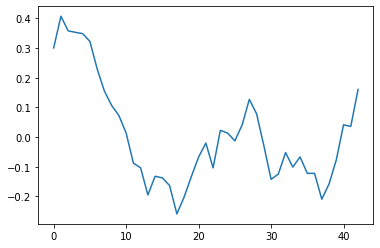

In [26]:
plt.plot(split_list)

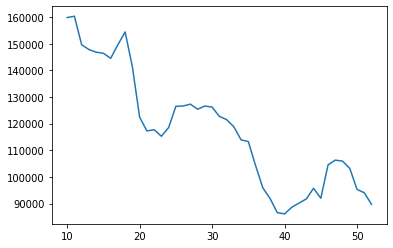

In [27]:
plt.plot(week_price_mean['Close'][split_span:])

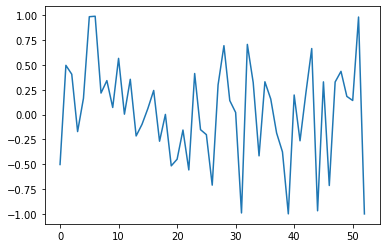

In [28]:
plt.plot(week_mean)